In [1]:
%matplotlib widget
import numpy as np
#import aplpy as apl
#import matplotlib.colors as col
import matplotlib.pyplot as plt
import spectral_cube as sc
#from matplotlib.colorbar import ColorbarBase
from astropy.wcs import WCS
from astropy.io import fits
import time

In [5]:
species = '13CO'
file = 'C:\\Users\\alexf\Japan internship\V_decomp\\13CO\\fits_files\\3RMS\\'
current_vel_file = fits.open(file + "13CO_Fit_Velocity.10chan.cube.fits")
current_vel_first_fit = current_vel_file[0].data[0,:,:]
current_vel_second_fit = current_vel_file[0].data[1,:,:]

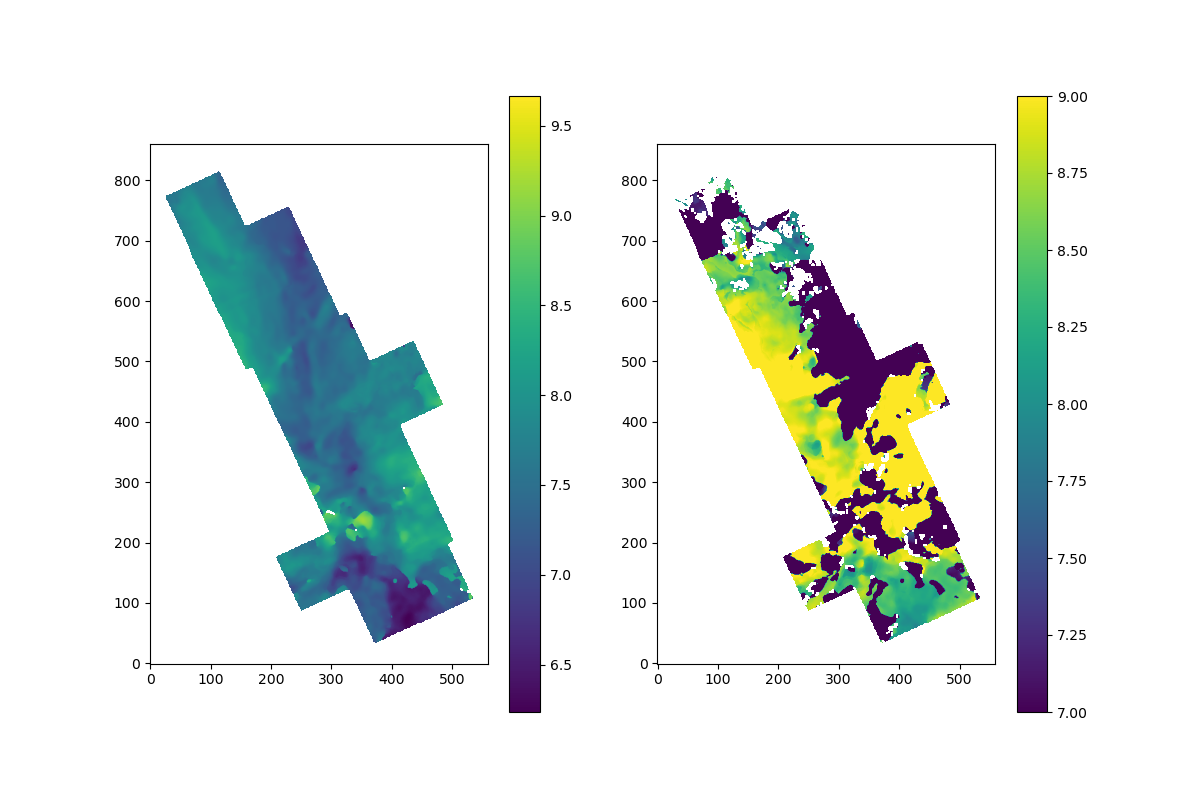

In [6]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(current_vel_first_fit,origin='lower')
plt.colorbar()
plt.subplot(122)
plt.imshow(current_vel_second_fit,origin='lower',vmin=7,vmax=9)
plt.colorbar()

In [7]:
vel_fit_shape = np.shape(current_vel_first_fit)
l_comp = np.ones(vel_fit_shape) * np.nan
d_comp = np.ones(vel_fit_shape) * np.nan
single_fit_mask = np.zeros(vel_fit_shape,dtype=bool)
print(vel_fit_shape)
for i in range(vel_fit_shape[0]):
    for j in range(vel_fit_shape[1]):
        current_first_fit = current_vel_first_fit[i,j]
        current_second_fit = current_vel_second_fit[i,j]
        
        if np.isnan(current_first_fit):
            continue
        elif np.isnan(current_second_fit):
            d_comp[i,j] = current_first_fit
            single_fit_mask[i,j] = True
        elif current_first_fit >= current_second_fit:
            d_comp[i,j] = current_first_fit
            l_comp[i,j] = current_second_fit
        elif current_first_fit <= current_second_fit:
            d_comp[i,j] = current_second_fit
            l_comp[i,j] = current_first_fit
            
            
multiple_fit_mask = np.logical_not(single_fit_mask)

(860, 560)


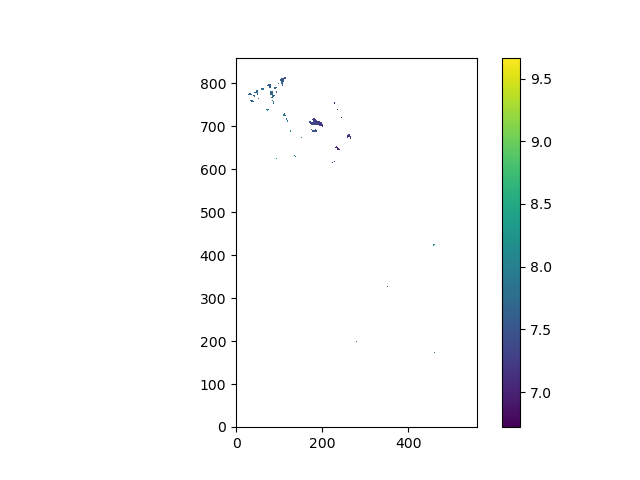

In [8]:
chan_num = '10chan'
plt.figure()
fit_count = fits.open(file+f'{species}_fit_count.{chan_num}.fits')

single_fit_vel = np.where(single_fit_mask,current_vel_first_fit,np.nan)


plt.imshow(single_fit_vel,origin='lower')
plt.colorbar()

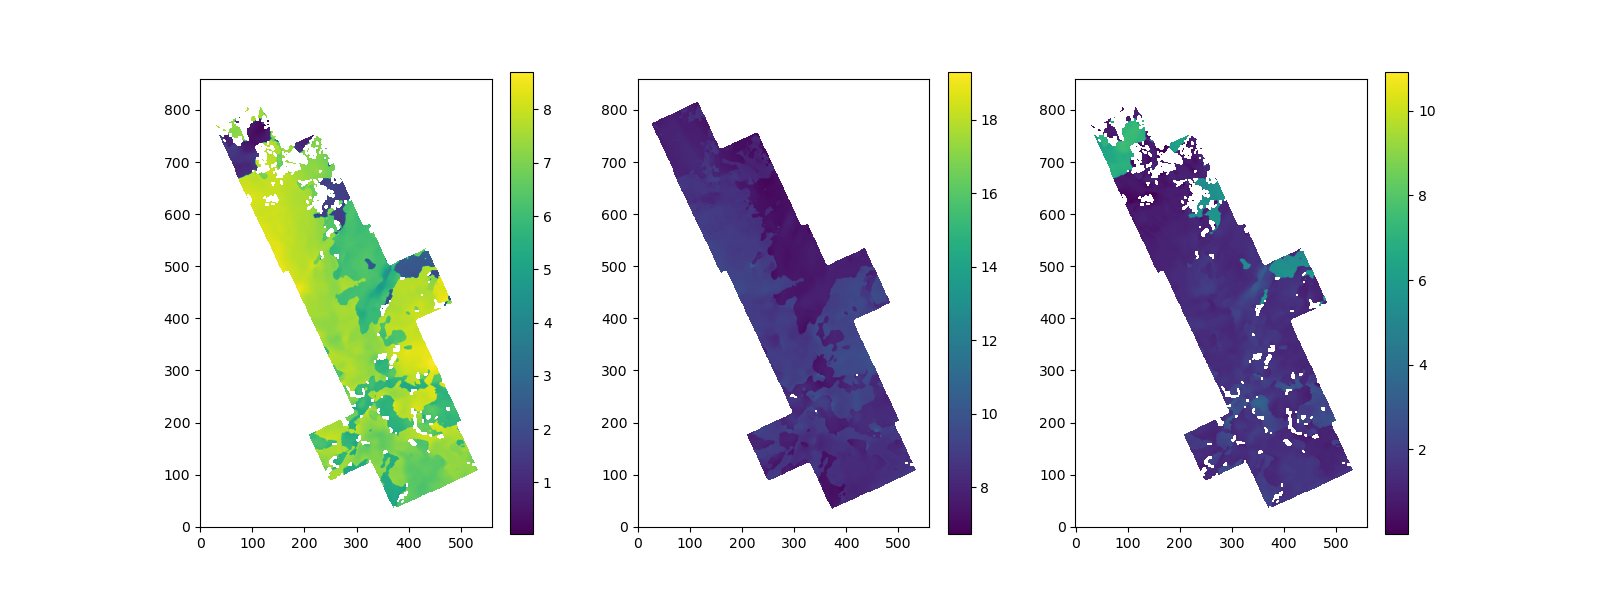

In [9]:
plt.figure(figsize=(16,6))
plt.subplot(131)
plt.imshow(l_comp,origin='lower')
plt.colorbar()
plt.subplot(132)
plt.imshow(d_comp,origin='lower')
plt.colorbar()

plt.subplot(133)
diff = d_comp-l_comp
plt.imshow(diff,origin='lower')
plt.colorbar()

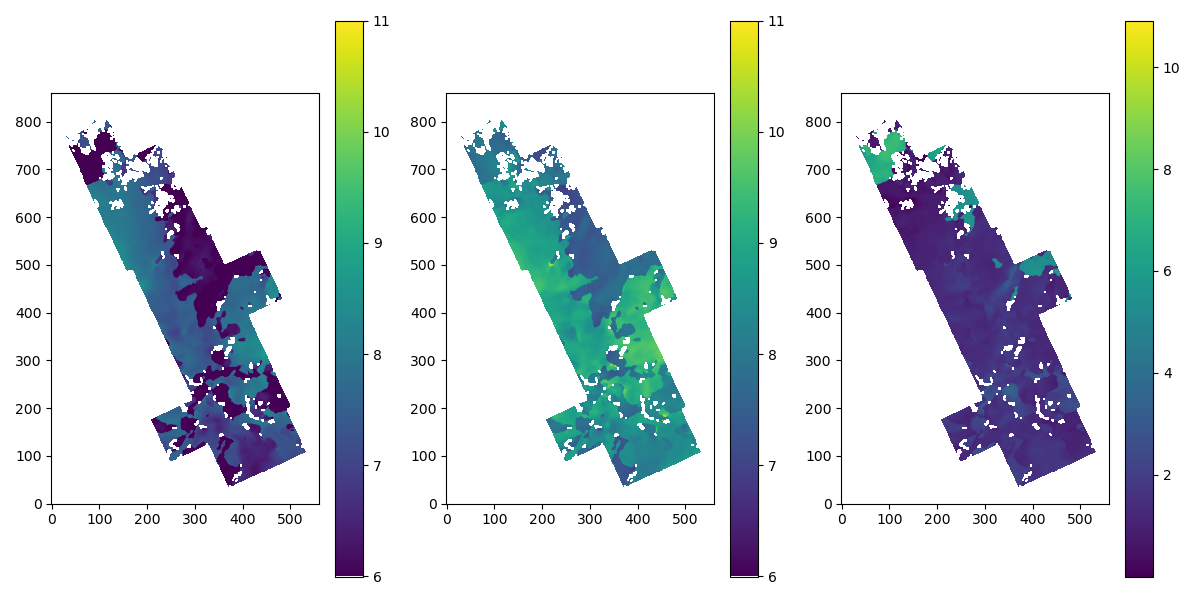

In [10]:
l_comp_multi = np.where(multiple_fit_mask==True,l_comp,np.nan)
d_comp_multi = np.where(multiple_fit_mask==True,d_comp,np.nan)

plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(l_comp_multi,origin='lower',vmin=6,vmax=11)
plt.colorbar()
plt.subplot(132)
plt.imshow(d_comp_multi,origin='lower',vmin=6,vmax=11)
plt.colorbar()

plt.subplot(133)
diff = d_comp_multi-l_comp_multi
plt.imshow(diff,origin='lower')
plt.colorbar()

plt.tight_layout()

In [ ]:
'''current_data = current_vel_second_fit - np.nanmean(single_fit_vel.flatten())
types = 'vel_second_fit'
chan_num = '10_chan.subtracted'
new_header = new_header_v_decomp(hdu,1,val_type="Velocity",val_unit="km/s")
fits_map = fits.PrimaryHDU(data=current_data,header=new_header)
fits_map.writeto(f'V_decomp//C18O//{species}.{types}.{chan_num}.fits',overwrite=True)
#new_cube.write(f'V_decomp//C18O//{species}.{types}.{chan_num}.fits',format='fits',overwrite=True)'''

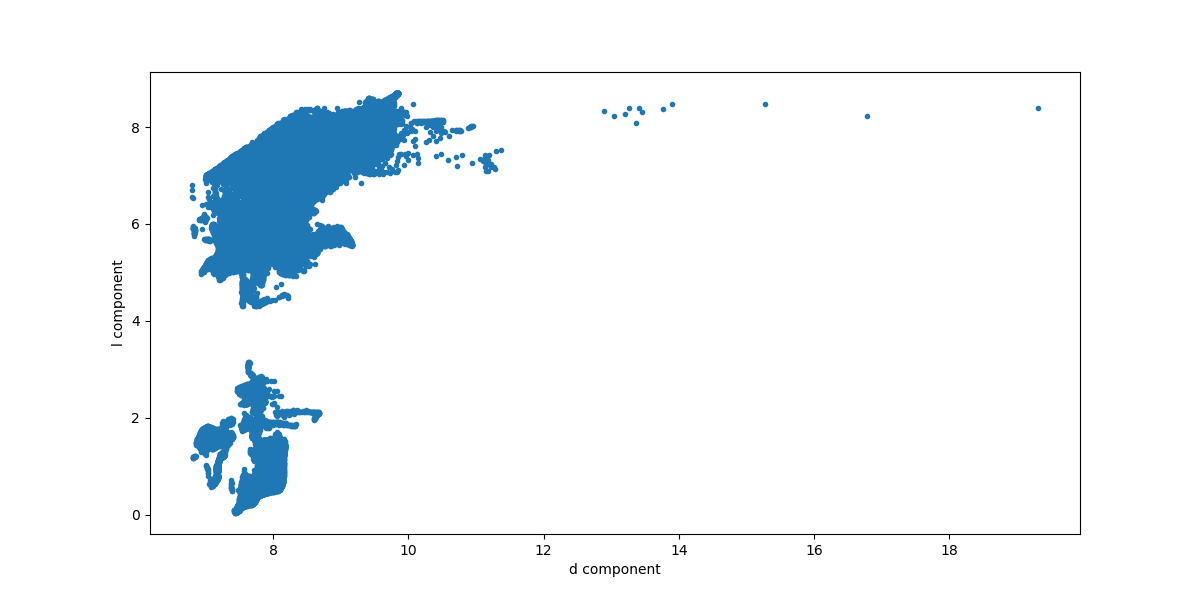

In [11]:
plt.figure(figsize=(12,6))
plt.plot(d_comp.flatten(),l_comp.flatten(),".")
plt.xlabel('d component')
plt.ylabel('l component')
plt.show()

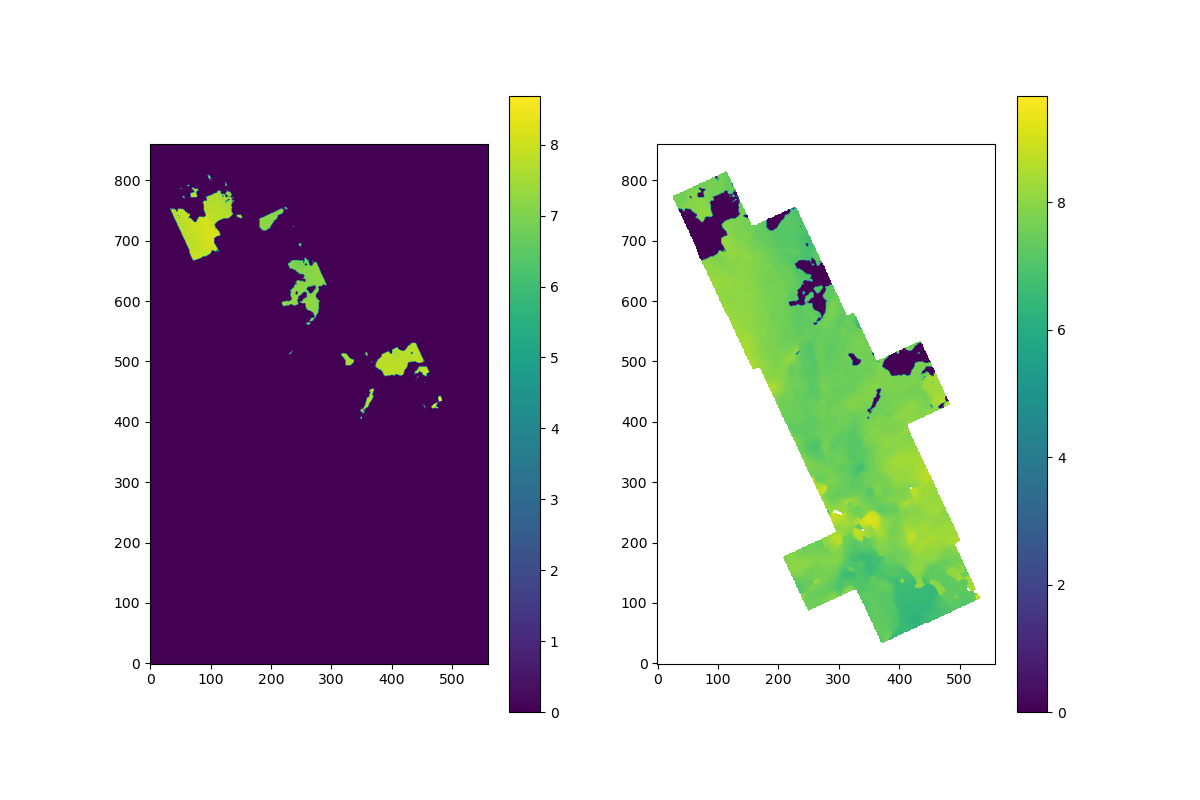

In [12]:
#vel_mask = np.logical_and( np.logical_and(d_comp>=1,d_comp<=13) , np.logical_and(l_comp>=1,l_comp<=13))
vel_mask = np.logical_and(l_comp<=4,d_comp<=9)


plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(np.where(vel_mask==True,current_vel_first_fit,0),origin='lower')
plt.colorbar()
plt.subplot(122)
plt.imshow(np.where(vel_mask==False,current_vel_first_fit,0),origin='lower')
plt.colorbar()

In [13]:
from astropy.wcs import wcs
model = np.load(file+'non_summed-model.npy',allow_pickle=True)
filename = f"C:\\Users\\alexf\Japan internship\\{species}\\ngc1333TP.{species}.cube.valueK.fits"
hdu = fits.open(filename)[0]
w= wcs.WCS(hdu.header)
def ch2v(ch, w):  # km/s
    x, y, v = w.wcs_pix2world(0, 0, ch, 0)
    return v / 1000.0

In [14]:
residuals = fits.open(file+f'{species}_residuals.{chan_num}.cube.fits')[0]
selected_residuals = residuals.data[:,309,313]

In [15]:
y_dec = 293
x_ra = 252

model_selected = model[x_ra,y_dec,:]

sum_test = np.nansum(model_selected,axis=0)
print(np.shape(sum_test))
data_selected = hdu.data[:,x_ra,y_dec]
print(np.shape(data_selected))

channel_cont = np.arange(0,np.shape(data_selected)[0])
velocity_cont = ch2v(channel_cont, w)

(1023,)
(1023,)


531
8.361359619259106


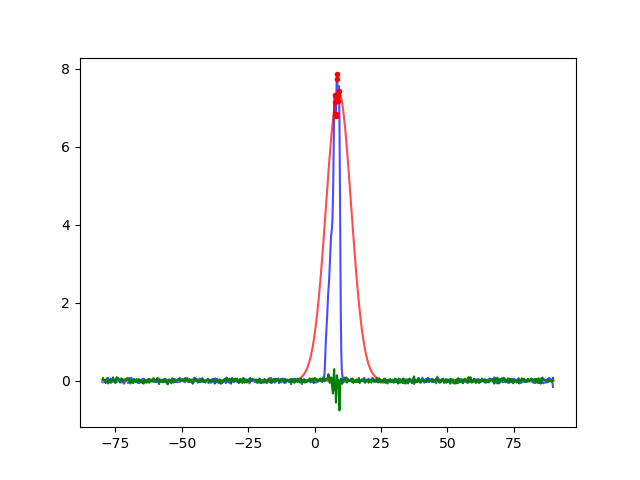

In [16]:
plt.figure()

#for i in range(np.shape(model_selected)[0]):
#    plt.plot(velocity_cont,model_selected[i],":")

'''plt.plot(velocity_cont,model_selected[0],':',alpha=0.5)
plt.plot(velocity_cont,model_selected[1],':',alpha=0.5)
#plt.plot(selected_final_model,color='green')'''

plt.plot(velocity_cont,data_selected,'b',alpha=0.7)
plt.plot(velocity_cont,sum_test,'r',alpha=0.7)
plt.plot(velocity_cont,sum_test-model_selected[0])
plt.plot(velocity_cont,sum_test-model_selected[0]-model_selected[1])
channel_max = np.nanargmax(data_selected)
print(channel_max)
print(velocity_cont[channel_max])
channel_tol = 5
velocity_current_cont = velocity_cont[channel_max - channel_tol : channel_max + channel_tol]
selected_current_slice = data_selected[channel_max - channel_tol : channel_max + channel_tol]

plt.plot(velocity_current_cont,selected_current_slice,"r.")
plt.plot(velocity_cont,selected_residuals,'g')

(array([8.3000e+01, 4.0700e+02, 1.4130e+03, 3.5490e+03, 5.8720e+03,
        6.8650e+03, 8.0840e+03, 8.1290e+03, 1.0330e+04, 6.7460e+03,
        8.2020e+03, 8.4000e+03, 7.8130e+03, 9.6140e+03, 9.0550e+03,
        8.9570e+03, 1.1114e+04, 1.1629e+04, 9.1360e+03, 8.1190e+03,
        6.9660e+03, 6.2020e+03, 3.2420e+03, 9.2600e+02, 2.8700e+02,
        3.1000e+01, 1.5000e+01, 1.7000e+01, 3.3000e+01, 4.5000e+01,
        7.0000e+00, 9.0000e+00, 4.0000e+00, 9.0000e+00, 2.0000e+00,
        1.2000e+01, 4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

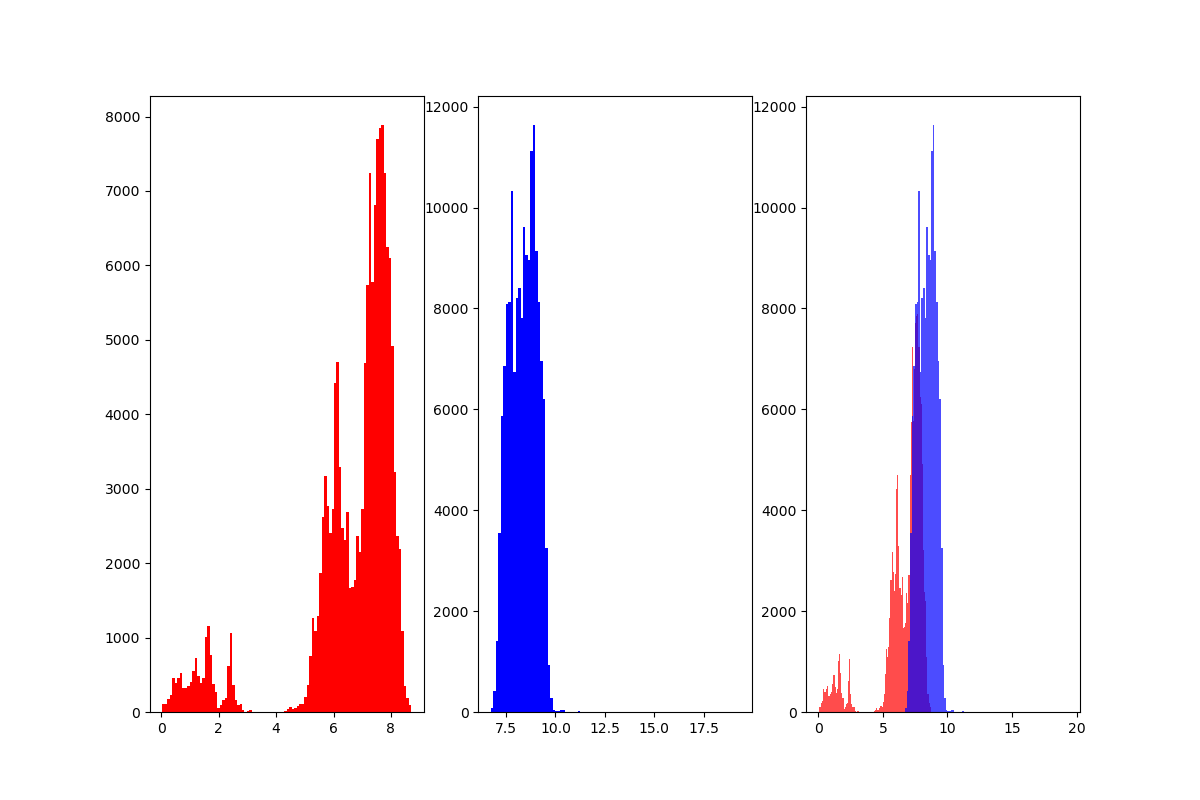

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(131)
l = plt.hist(l_comp.flatten(),color='red',bins=100)
plt.subplot(132)
d = plt.hist(d_comp.flatten(),color='blue',bins=100)


plt.subplot(133)
#_,bins,_ = plt.hist(l_comp.flatten(),bins=100,color='red',alpha=0.7,range=[np.nanmin(d_comp.flatten()),np.nanmax(d_comp.flatten())])
plt.hist(l_comp.flatten(),bins=100,color='red',alpha=0.7)
plt.hist(d_comp.flatten(),bins=100,color='blue',alpha=0.7)

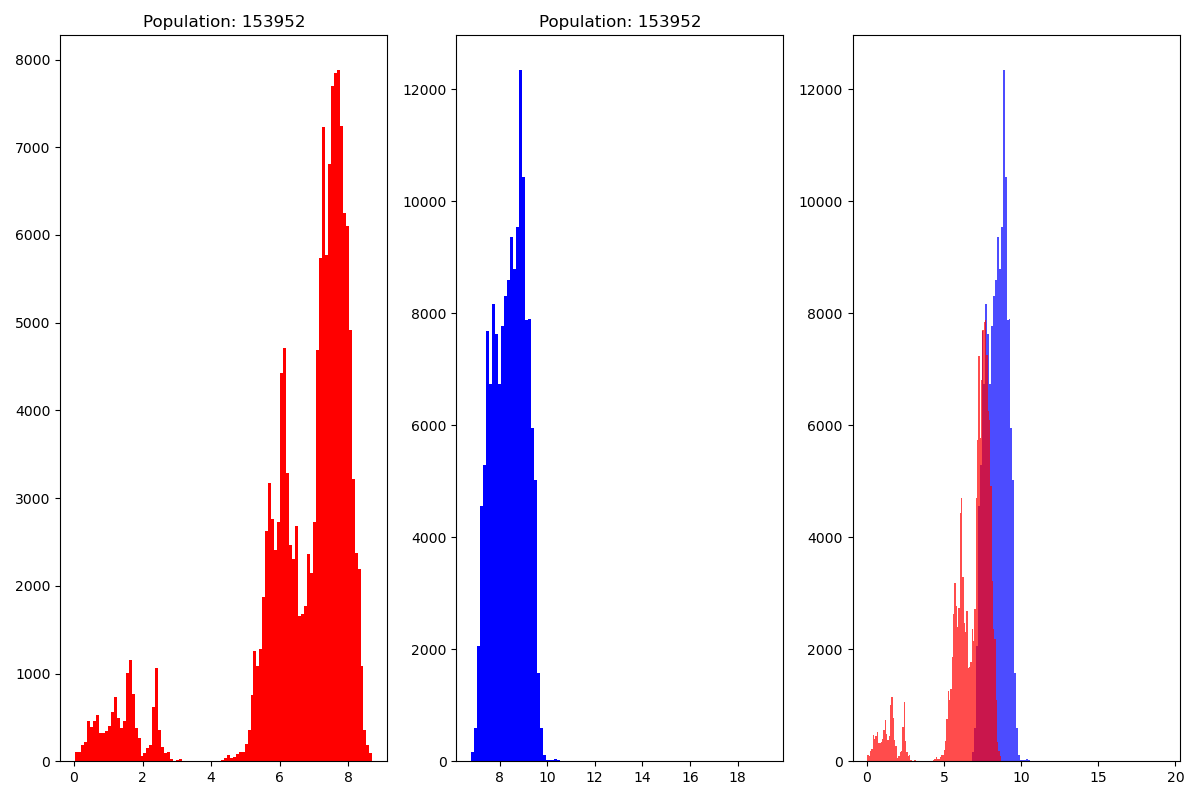

In [18]:
plt.figure(figsize=(12,8))
plt.subplot(131)
l = plt.hist(l_comp_multi.flatten(),color='red',bins=100)
plt.title(f"Population: {np.sum(l[0]):.0f}")
plt.subplot(132)
d = plt.hist(d_comp_multi.flatten(),color='blue',bins=100)
plt.title(f"Population: {np.sum(d[0]):.0f}")


plt.subplot(133)
#_,bins,_ = plt.hist(l_comp_multi.flatten(),bins=100,color='red',alpha=0.7,range=[np.nanmin(d_comp_multi.flatten()),np.nanmax(d_comp_multi.flatten())])
plt.hist(d_comp_multi.flatten(),bins=100,color='blue',alpha=0.7)
plt.hist(l_comp_multi.flatten(),bins=100,color='red',alpha=0.7)

plt.tight_layout()

7.577182
7.615118


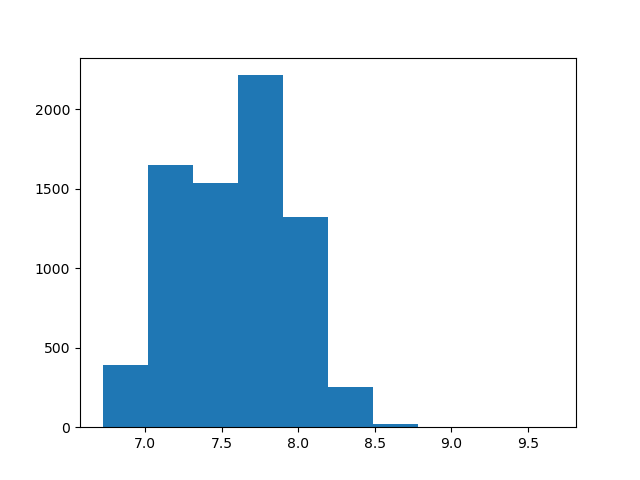

In [19]:
plt.figure()
plt.hist(single_fit_vel.flatten())
print(np.nanmean(single_fit_vel.flatten()))
print(np.nanmedian(single_fit_vel.flatten()))

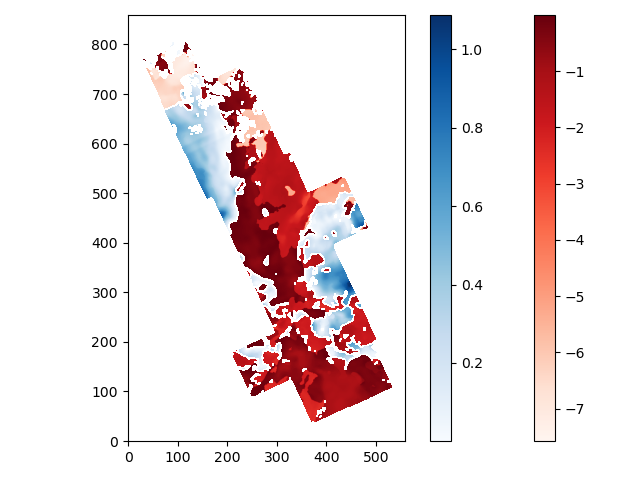

In [20]:
plt.figure()
l_vel_comp_subtracted = l_comp - np.nanmedian(single_fit_vel.flatten())

l_vel_comp_sub_above = np.where(l_vel_comp_subtracted>=0,l_vel_comp_subtracted,np.nan)
l_vel_comp_sub_below = np.where(l_vel_comp_subtracted<=0,l_vel_comp_subtracted,np.nan)
plt.imshow(l_vel_comp_sub_below,origin='lower',cmap='Reds')
plt.colorbar()
plt.imshow(l_vel_comp_sub_above,origin='lower',cmap='Blues')
plt.colorbar()
plt.tight_layout()

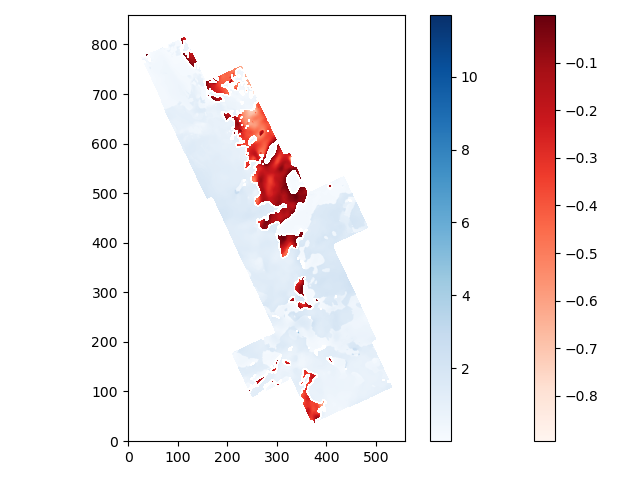

In [21]:
plt.figure()
d_vel_comp_subtracted = d_comp - np.nanmedian(single_fit_vel.flatten())

d_vel_comp_sub_above = np.where(d_vel_comp_subtracted>=0,d_vel_comp_subtracted,np.nan)
d_vel_comp_sub_below = np.where(d_vel_comp_subtracted<=0,d_vel_comp_subtracted,np.nan)
plt.imshow(d_vel_comp_sub_below,origin='lower',cmap='Reds')
plt.colorbar()
plt.imshow(d_vel_comp_sub_above,origin='lower',cmap='Blues')
plt.colorbar()
plt.tight_layout()